In [1]:
import TMQGP as tm
import QuarkTM
import tqdm
from numpy import *

import h5py

import matplotlib
matplotlib.style.use('publication23')

In [2]:
erange = linspace(-5, 5, 201)
qrange = linspace(0, 5, 51)

In [3]:
df = h5py.File('/home/const/Numerics/TMQGP/ipy/TMQGP/test/FitChi2/4ch_HI/0.00/data_single_170.hdf5')

Gtab = array(df['Q']['G'])
Stab = array(df['Q']['S'])

mQ = df.attrs['mQ']

In [4]:
T = 0.2

In [5]:
pt1 = QuarkTM.Particle(mQ, qrange, erange, Gtab=Gtab, S=Stab)

In [6]:
ch_conv = QuarkTM.Channel(pt1, pt1, T, ImMode=0, expand=0)
ch_int = QuarkTM.Channel(pt1, pt1, T, ImMode=1, expand=0)

100%|███████████████████████████████████████████████████████████████████████████████| 51/51 [00:00<00:00, 86.84it/s]


In [7]:
Stab_lim = []
eps_lim = 5e-3

for s in Stab.transpose():
    if max(abs(imag(s))) < eps_lim:
        s_new = real(s) + 1j*imag(s) / max(abs(imag(s))) * eps_lim
    else:
        s_new = s
    Stab_lim += [s_new]

Stab_lim = array(Stab_lim).transpose()

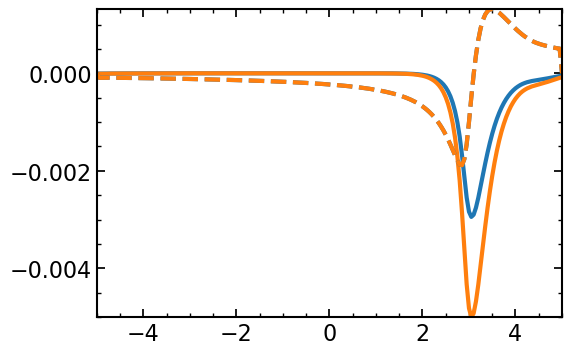

In [8]:
l0, = plt.plot(erange, imag(Stab[:, 30]))
l1, = plt.plot(erange, imag(Stab_lim[:, 30]))

plt.plot(erange, real(Stab[:, 30]), ls='--', c=l0.get_c())
plt.plot(erange, real(Stab_lim[:, 30]), ls='--', c=l1.get_c())

In [9]:
iG = tm.RhoInterpolator(qrange, erange, ascontiguousarray(real(Stab_lim)), ascontiguousarray(imag(Stab_lim)), 
                      qrange, pt1.peaks, pt1.widths, "imag", mQ)

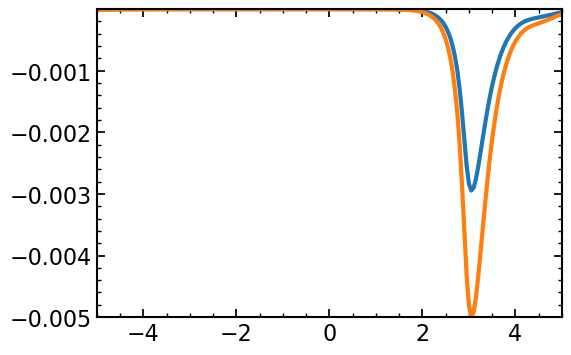

In [10]:
plt.plot(erange, imag(Stab[:, 30]))
plt.plot(erange, imag(Stab_lim[:, 30]))

[]

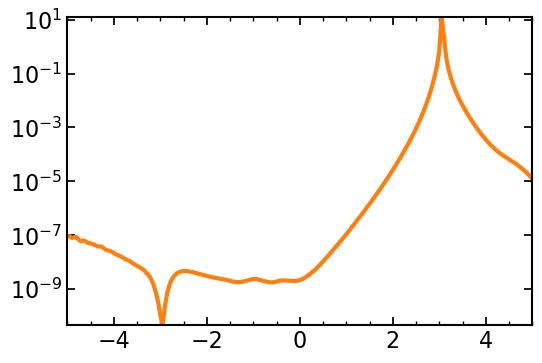

In [11]:
plt.plot(erange, [-iG(3, e) for e in erange])
plt.plot(erange, -imag(pt1.Gtab[:, 30]))
plt.semilogy()

## Try to calculate G2 with a limited width propagator

In [12]:
qrange2 = linspace(0, 10, 101)

In [13]:
e = 1.5

In [14]:
import tqdm

In [15]:
ReG2 = array([tm.ReG2_pole(e, q, T, pt1.R, pt1.R) for q in tqdm.tqdm(qrange2)])

100%|█████████████████████████████████████████████████████████████████████████████| 101/101 [00:02<00:00, 49.66it/s]


In [16]:
ReG2_2 = array([tm.ReG2_pole(e, q, T, iG, iG) for q in tqdm.tqdm(qrange2)])

100%|█████████████████████████████████████████████████████████████████████████████| 101/101 [00:02<00:00, 49.55it/s]


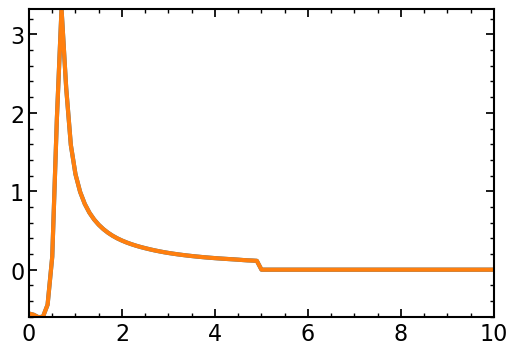

In [18]:
plt.plot(qrange2, ReG2)
plt.plot(qrange2, ReG2_2)

# plt.semilogy()

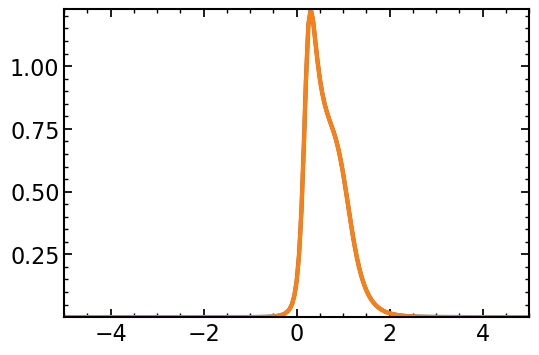

In [19]:
plt.plot(pt1.erange, pt1.Rtab[:, 0])
plt.plot(pt1.erange, [pt1.R(0, e) for e in pt1.erange])

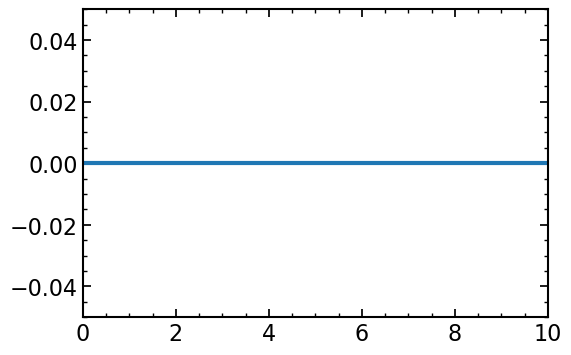

In [22]:
plt.plot(qrange2, abs(ReG2-ReG2_2))

# plt.semilogy()

### Im G2

In [23]:
ImG2 = array([tm.G2_conv_ff_pole(e, q, T, pt1.R, pt1.R) for q in tqdm.tqdm(qrange2)])

100%|██████████████████████████████████████████████████████████████████████████| 101/101 [00:00<00:00, 16901.05it/s]


In [24]:
ImG2_2 = array([tm.G2_conv_ff_pole(e, q, T, iG, iG) for q in tqdm.tqdm(qrange2)])

100%|██████████████████████████████████████████████████████████████████████████| 101/101 [00:00<00:00, 16568.55it/s]


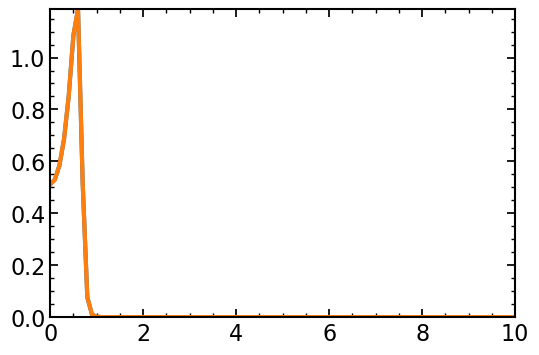

In [26]:
plt.plot(qrange2, ImG2)
plt.plot(qrange2, ImG2_2)

## Im as a function of E

In [27]:
ch = QuarkTM.Channel(pt1, pt1, T, ImMode=1, expand=2, G2_mode=0)

100%|█████████████████████████████████████████████████████████████████████████████| 501/501 [00:36<00:00, 13.57it/s]
/home/const/Numerics/TMQGP/py/QuarkTM.py:362: RuntimeWarning: divide by zero encountered in divide
  np.ascontiguousarray(np.real(1/self.G2)), np.ascontiguousarray(np.imag(1/self.G2)), 'real')
/home/const/Numerics/TMQGP/py/QuarkTM.py:362: RuntimeWarning: invalid value encountered in divide
  np.ascontiguousarray(np.real(1/self.G2)), np.ascontiguousarray(np.imag(1/self.G2)), 'real')
/home/const/Numerics/TMQGP/py/QuarkTM.py:364: RuntimeWarning: divide by zero encountered in divide
  np.ascontiguousarray(np.real(1/self.G2)), np.ascontiguousarray(np.imag(1/self.G2)), 'imag')
/home/const/Numerics/TMQGP/py/QuarkTM.py:364: RuntimeWarning: invalid value encountered in divide
  np.ascontiguousarray(np.real(1/self.G2)), np.ascontiguousarray(np.imag(1/self.G2)), 'imag')


In [78]:
ch2 = QuarkTM.Channel(pt1, pt1, T, ImMode=1, expand=0, G2_mode=0)

100%|███████████████████████████████████████████████████████████████████████████████| 51/51 [00:00<00:00, 86.15it/s]


In [70]:
ch.ImG2

array([[-2.88655547e-25, -2.87685319e-25, -2.86751971e-25, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-3.27456080e-04, -3.12522163e-04, -2.96472366e-04, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-6.90090465e-04, -6.58622993e-04, -6.24783706e-04, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       ...,
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [39]:
ch.ReG2

array([[-0.70254312, -0.70301365, -0.70306891, ...,  0.        ,
         0.        ,  0.        ],
       [-0.70842447, -0.70885543, -0.70885961, ...,  0.        ,
         0.        ,  0.        ],
       [-0.71431216, -0.71470237, -0.71465887, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.0914838 ,  0.0916439 ,  0.09186625, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.09141236,  0.09157259,  0.09179455, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [40]:
pt1.R(0.5, 0.5)

0.9021607803207522

In [41]:
ch.ImG2[:, 0]

array([-2.88655547e-25, -3.27456080e-04, -6.90090465e-04, ...,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00])

In [42]:
iIm = tm.Interpolator(ch.erange, ch.ImG2[:, 0], 'linear')

In [43]:
rekk = array([tm.ReSigmaKK(e, iIm, Lambda=10) for e in ch.erange])

In [44]:
iIm(0.5)

-0.5978178064826488

In [45]:
rekk

array([-0.70254312, -0.70842447, -0.71431216, ...,  0.0914838 ,
        0.09141236,  0.        ])

In [46]:
q = 3

In [47]:
ImG2_e = array([tm.G2_conv_ff_pole(e, q, T, pt1.R, pt1.R) for e in tqdm.tqdm(erange)])

100%|██████████████████████████████████████████████████████████████████████████| 201/201 [00:00<00:00, 35348.22it/s]


[]

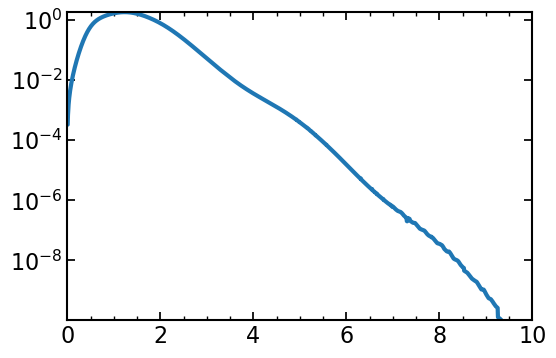

In [48]:
plt.plot(ch.erange, -imag(ch.G2[:, 0]))
plt.semilogy()

In [49]:
i_q = np.argmin(abs(ch.qrange - q))
i_q, ch.qrange[i_q]


(150, 3.0)

In [50]:
erange_dense = linspace(0, 10, 1500)

In [51]:
iImG2 = tm.Interpolator2D(ch.qrange, ch.erange, ascontiguousarray(ch.ImG2))

In [52]:
ch.erange[1] - ch.erange[0]

0.006666666666666667

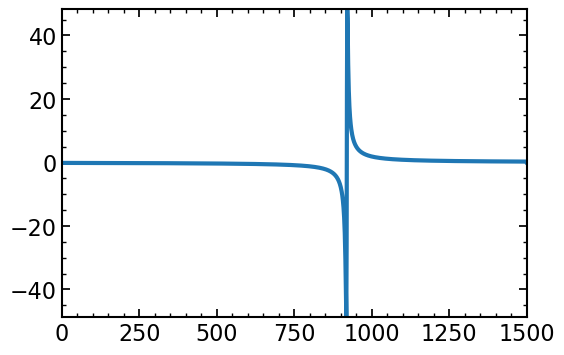

In [53]:
plt.plot(ch.ReG2[:, i_q])

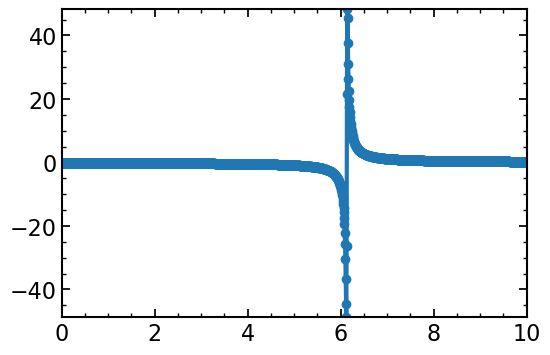

In [54]:
# plt.plot(ch.erange, ch.ImG2[:, i_q])
plt.plot(ch.erange, ch.ReG2[:, i_q], marker='o')
# plt.plot(erange_dense, [ch.iImG2(q, e) for e in erange_dense])
# plt.plot(erange_dense, [iImG2(q, e) for e in erange_dense], ls='--')
# plt.xlim(5.5, 6.5)

/tmp/ipykernel_8508/78684392.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(ch.erange, log(-ch.ImG2[:, 0]))


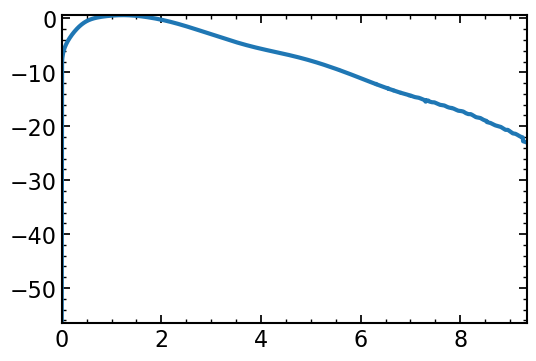

In [55]:
plt.plot(ch.erange, log(-ch.ImG2[:, 0]))

# plt.ylim(-5000, 1000)

In [56]:
iG = tm.GFInterpolator(qrange, erange, ascontiguousarray(real(Stab_lim)), ascontiguousarray(imag(Stab_lim)), 
                      qrange, pt1.peaks, pt1.widths, "imag", mQ)

In [57]:
e = 2.5
i_e = argmin(abs(ch.erange - e))

In [58]:
ReG2 = array([tm.ReG2_pole(e, q, T, pt1.R, pt1.R) for q in tqdm.tqdm(ch.qrange)])

100%|█████████████████████████████████████████████████████████████████████████████| 501/501 [00:09<00:00, 52.27it/s]


In [59]:
ReG2_2 = array([tm.ReG2_pole(e, q, T, iG, iG) for q in tqdm.tqdm(ch.qrange)])

100%|█████████████████████████████████████████████████████████████████████████████| 501/501 [00:10<00:00, 46.01it/s]


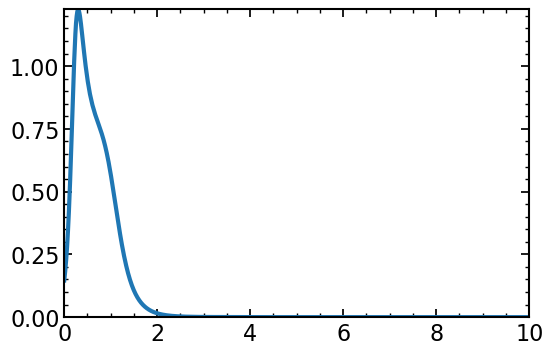

In [60]:
plt.plot(ch.erange, [pt1.R(0, e) for e in ch.erange])

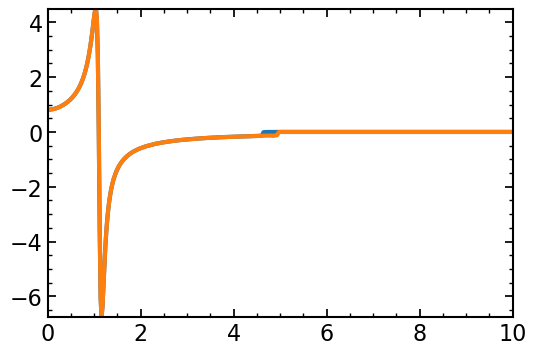

In [61]:
plt.plot(ch.qrange, (ch.ReG2[i_e, :]))
# plt.plot(ch.qrange)
plt.plot(ch.qrange, (-ReG2))
# plt.plot(ch.qrange, (-ReG2_2)/pi**2)
# plt.xlim(2, 4)
# plt.semilogy()

[]

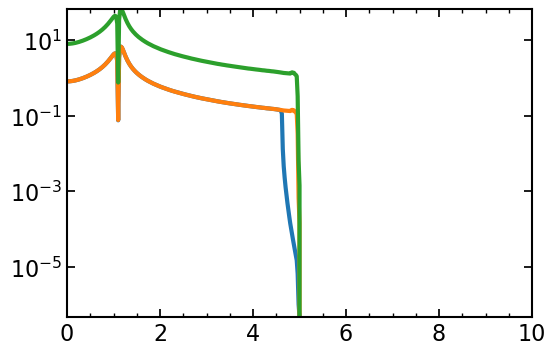

In [62]:
plt.plot(ch.qrange, abs(ch.ReG2[i_e, :]))
# plt.plot(ch.qrange)
plt.plot(ch.qrange, abs(-ReG2))
plt.plot(ch.qrange, abs(-ReG2_2))
# plt.xlim(2, 4)
plt.semilogy()

In [63]:
ch.populate_T_fast()

In [79]:
ch2.populate_T_fast()

(0.0, 5.0)

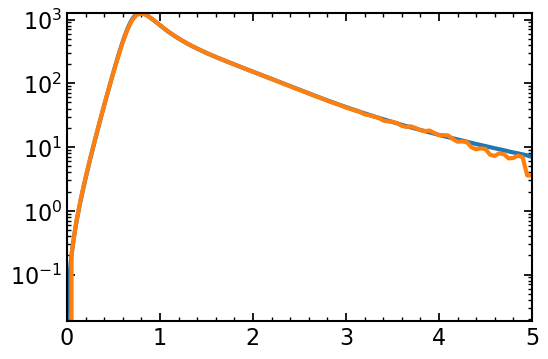

In [81]:
plt.plot(ch.erange, -imag(ch.TM[:, 0]))
plt.plot(ch2.erange, -imag(ch2.TM[:, 0]))
plt.semilogy()

plt.xlim(0, 5)
# plt.ylim(1, 1000)
# plt.xlim(5, 6)

In [220]:
ch2 = QuarkTM.Channel(pt1, pt1, T, ImMode=1, expand=0, G2_mode=0)


 38%|████████████████████████████▉                                                | 188/501 [00:19<00:09, 31.99it/s]

In [217]:
ch2.erange

NameError: name 'ch2' is not defined

In [226]:
ReG2_2d = array([[tm.ReG2_pole(e, q, T, iG, iG) for q in ch2.qrange] for e in tqdm.tqdm_notebook(ch2.erange)])

/tmp/ipykernel_120366/546411871.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  ReG2_2d = array([[tm.ReG2_pole(e, q, T, iG, iG) for q in ch2.qrange] for e in tqdm.tqdm_notebook(ch2.erange)])


  0%|          | 0/201 [00:00<?, ?it/s]

In [228]:
ImG2_2d = array([[-pi*tm.G2_conv_ff(e, q, T, iG, iG) for q in ch2.qrange] for e in tqdm.tqdm_notebook(ch2.erange)])

/tmp/ipykernel_120366/2017137156.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  ImG2_2d = array([[-pi*tm.G2_conv_ff(e, q, T, iG, iG) for q in ch2.qrange] for e in tqdm.tqdm_notebook(ch2.erange)])


  0%|          | 0/201 [00:00<?, ?it/s]

In [239]:
ch2 = QuarkTM.Channel(pt1, pt1, T, G2 = -ReG2_2d + 1j*ImG2_2d, expand=0)

In [240]:
ch2.populate_T_fast()

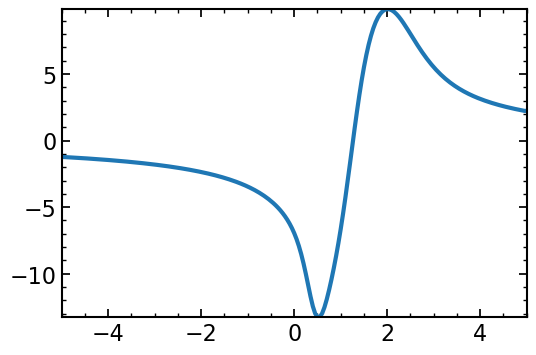

In [241]:
plt.plot(ch2.erange, real(ch2.G2[:, 0]))

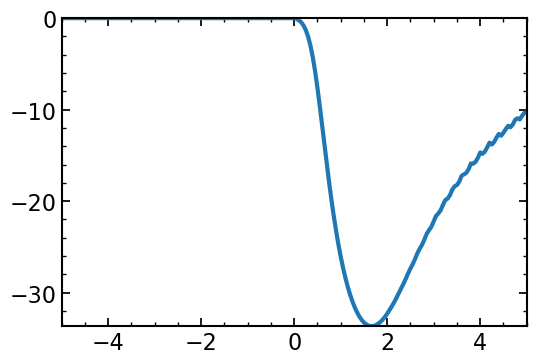

In [242]:
plt.plot(ch2.erange, imag(ch2.TM[:, 0]))

In [ ]:
plt.plot()